## Mask Overlays Tutorial

In this tutorial, we will visualize slices of an example CT dataset and overlay the masks on the CT images.

In [15]:
import h5py
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

First, load a single HDF5 file and list datasets and attributes

See [README.md](../README.md) for how to download dataset from AWS.

To use data from AWS interactively in Python [install](https://boto3.amazonaws.com/v1/documentation/api/latest/guide/quickstart.html) and use the [AWS Python SDK](https://docs.aws.amazon.com/code-library/latest/ug/python_3_s3_code_examples.html)

In [7]:
# change to location of downloaded dataset
hdf5_dir = "../hdf5_dir"

# pick a single file for the purposes of this tutorial
filepath = os.path.join(hdf5_dir,"Zz99Ji2swU.hdf5")

# print HDF5 contents
with h5py.File(filepath, "r") as hdf:
    print(f"HDF5 file datasets: {list(hdf.keys())}")
    print(f"HDF5 file attributes: {list(hdf.attrs.keys())}")

HDF5 file datasets: ['arterial', 'delay', 'mask', 'noncon', 'portven']
HDF5 file attributes: ['Manufacturer', 'PID', 'Patient Age', 'Patient Sex', 'arterial_pixdim', 'delay_pixdim', 'mask_pixdim', 'noncon_pixdim', 'pathology', 'pathology_grade', 'portven_pixdim', 'tumor_type']


Extract the unenhanced CT volume (noncon), the arterial phase and the tumor mask from the HDF5 file

In [8]:
with h5py.File(filepath, "r") as hdf:
    noncon = hdf["noncon"][:]
    arterial = hdf["arterial"][:]
    mask = hdf["mask"][:]

print(f"noncon size: {noncon.shape}")
print(f"arterial size: {arterial.shape}")
print(f"mask size: {mask.shape}")

noncon size: (512, 512, 49)
arterial size: (512, 512, 49)
mask size: (512, 512, 49)


Find the tumor mask slices that include tumor (i.e. slices where mask isn't all zeros)

In [9]:
# find mask slices that include tumor
sl_idx = [sl for sl in range(mask.shape[2]) 
          if mask[:,:,sl].any()]
print(f"Slice indices with tumor: {sl_idx}")

Slice indices with tumor: [5, 6, 7, 8]


Write a simple function to plot multiple slices of CT volume

In [10]:
def plot_slices(data, slices):

    num_plots = len(slices)
    _, axs = plt.subplots(figsize=(4*num_plots,4), ncols=num_plots, nrows=1)
    
    for i, sl in enumerate(slices):
        axs[i].imshow(data[:,:,sl], cmap="Greys_r", 
                      interpolation='none', vmin=-200, vmax=800) # set limits based on expected HU in renal CT
        axs[i].axis('off')
    
    plt.show()

Visualize the unenhacned (noncon) and arterial volume for the four slices with the tumor:

Unenhanced/Noncon:


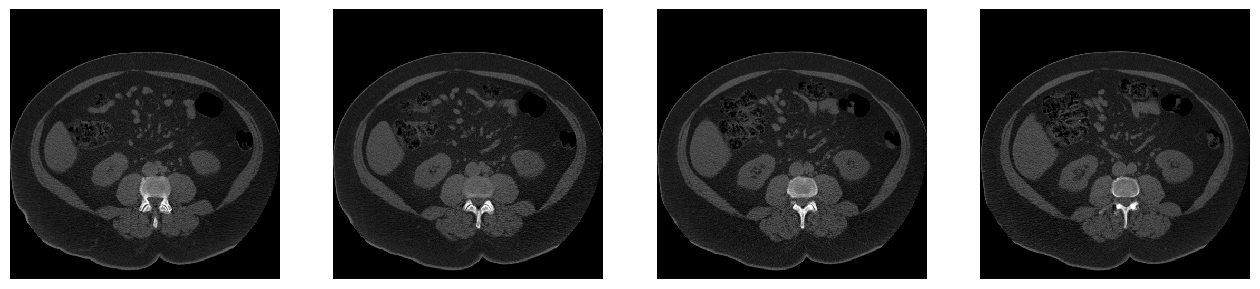

Arterial:


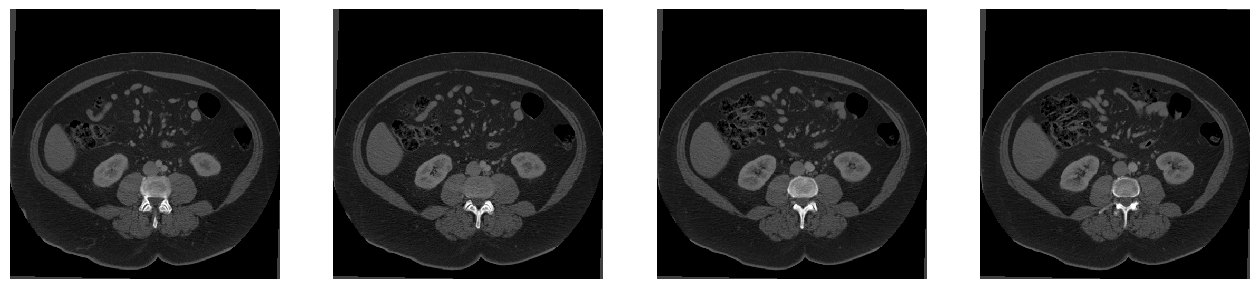

In [12]:
print("Unenhanced/Noncon:")
plot_slices(noncon, sl_idx)
print("Arterial:")
plot_slices(arterial, sl_idx)

Adjust function from before to overlay mask in blue 

In [30]:
def plot_slices_overlay(data, mask, slices):

    num_plots = len(slices)
    _, axs = plt.subplots(figsize=(4*num_plots,4), ncols=num_plots, nrows=1)
    cmap_overlay = ListedColormap(["none", [51/255, 153/255, 255/255]])
    
    for i, sl in enumerate(slices):
        axs[i].imshow(data[:,:,sl], cmap="Greys_r", 
                      interpolation='none', vmin=-200, vmax=800) # set limits based on expected HU in renal CT
        axs[i].imshow(mask[:, :, sl], cmap=cmap_overlay, 
                      interpolation='none', vmin=0, vmax=1, alpha=0.5)
        axs[i].axis('off')
    
    plt.show()

Visualize tumor masks overlaid on unenhanced (noncon) and arterial CT volumes:

Noncon/Unenhanced CT with Tumor in Blue:


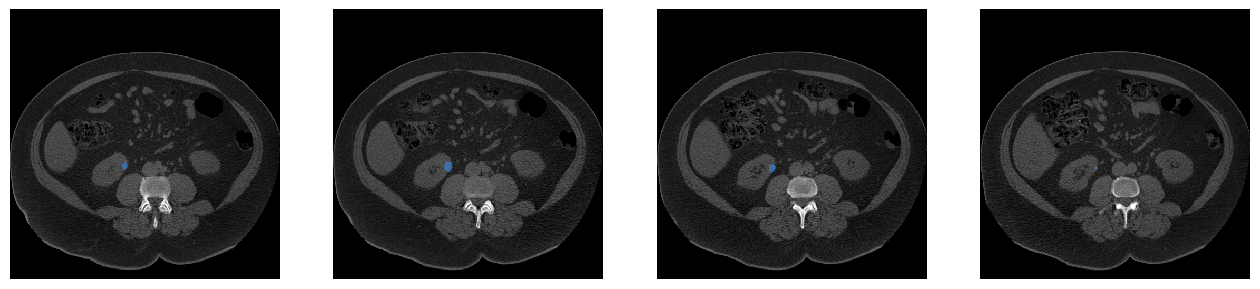

Arterial Contrast Enhanced CT with Tumor in Blue:


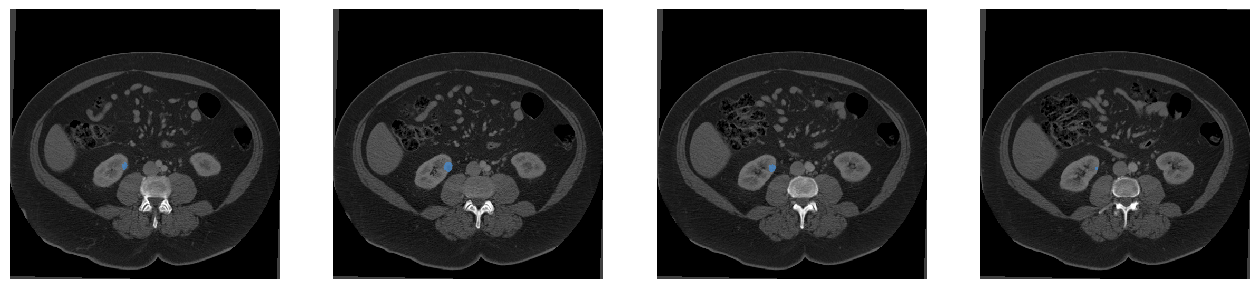

In [31]:
print("Noncon/Unenhanced CT with Tumor in Blue:")
plot_slices_overlay(noncon, mask, sl_idx)
print("Arterial Contrast Enhanced CT with Tumor in Blue:")
plot_slices_overlay(arterial, mask, sl_idx)